In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import statistics as sts
from networkx.algorithms import isomorphism
import itertools

In [2]:
def show_graph_stats(G):
    triangles = nx.triangles(G).values()
    degrees = dict(nx.degree(G)).values()
    number_of_nodes = G.number_of_nodes()

    try:
        average_clustering = nx.average_clustering(G)
    except:
        average_clustering = 0

    # try catch for core
    try:
        core = nx.core_number(G)
    except:
        core = 0

    print("Nodes: ", 
          number_of_nodes)
    print("Edges: ", 
          G.number_of_edges())
    print("Density: ", 
          nx.density(G))
    print("Max degree: ", 
          max(degrees))
    print("Min degree: ", 
          min(degrees))
    print("Average degree: ", 
          sts.mean(degrees))
    print("Assortativity: ", 
          nx.degree_assortativity_coefficient(G))
    print("Number of triangles: ", 
          sum(triangles) / 3)
    print("Average number of triangles: ", 
          average_clustering * number_of_nodes)
    print("Average clustering: ", 
          average_clustering)
    print("Maximum number of triangles: ", 
          max(triangles))
    print("Average clustering coefficient: ", 
          average_clustering)
    print("Fraction of closed triangles: ", 
          nx.transitivity(G))
    print("Maximum k-core: ", 
          max(core.values()))

In [3]:
def find_subgraphs_of_size_n(graph, n):
    subgraphs = []
    for nodes in itertools.combinations(graph.nodes(), n):
        subgraph = graph.subgraph(nodes)
        if len(subgraph) == n and nx.is_connected(subgraph):
            subgraphs.append(subgraph)
    return subgraphs

In [4]:
graph_file = open("../data/tests/c.edges", "r")
graph1 = nx.read_weighted_edgelist(graph_file)
graph1.remove_edges_from(list(nx.selfloop_edges(graph1)))
graph_file.close()

In [5]:
graph_file = open("../data/tests/d.edges", "r")
graph2 = nx.read_weighted_edgelist(graph_file)
graph2.remove_edges_from(list(nx.selfloop_edges(graph2)))
graph_file.close()

In [6]:
show_graph_stats(graph1)

Nodes:  9
Edges:  12
Density:  0.3333333333333333
Max degree:  4
Min degree:  2
Average degree:  2.6666666666666665
Assortativity:  -0.05882352941176437
Number of triangles:  0.0
Average number of triangles:  0.0
Average clustering:  0.0
Maximum number of triangles:  0
Average clustering coefficient:  0.0
Fraction of closed triangles:  0
Maximum k-core:  2


In [7]:
show_graph_stats(graph2)

Nodes:  6
Edges:  7
Density:  0.4666666666666667
Max degree:  3
Min degree:  2
Average degree:  2.3333333333333335
Assortativity:  -0.16666666666666508
Number of triangles:  0.0
Average number of triangles:  0.0
Average clustering:  0.0
Maximum number of triangles:  0
Average clustering coefficient:  0.0
Fraction of closed triangles:  0
Maximum k-core:  2


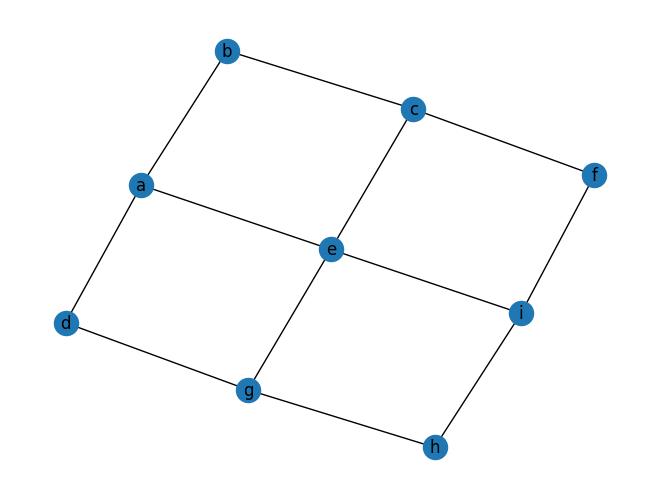

In [8]:
# plot graph1
nx.draw(graph1, with_labels=True)
plt.show()

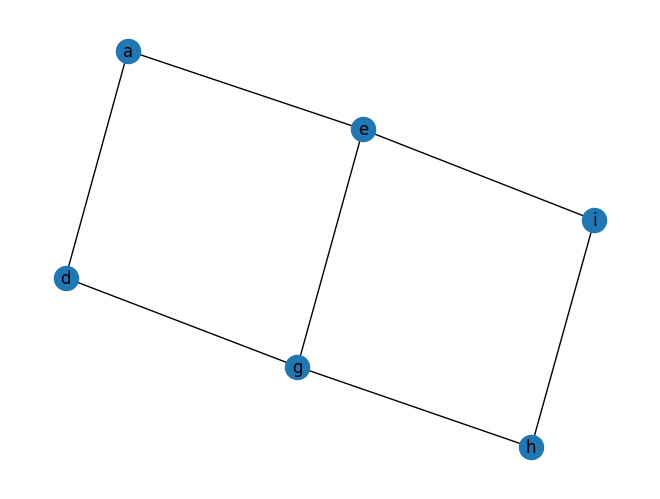

In [9]:
# plot graph2
nx.draw(graph2, with_labels=True)
plt.show()

In [10]:
subgraphs = find_subgraphs_of_size_n(graph1, graph2.number_of_nodes())

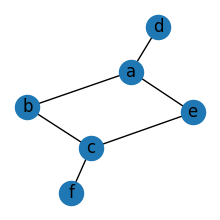

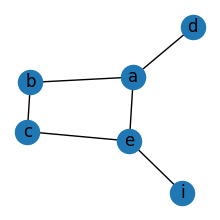

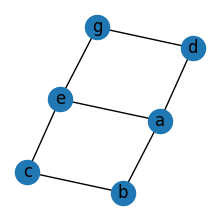

Subgraph 2 is isomorphic to graph2


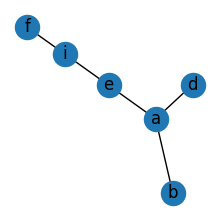

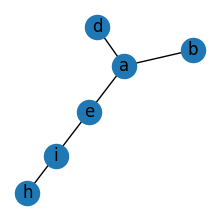

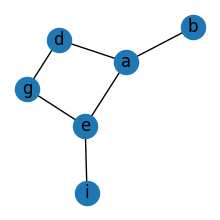

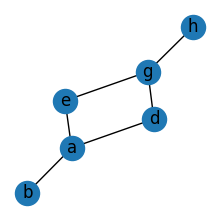

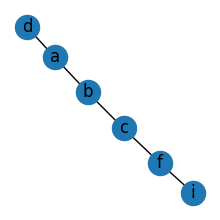

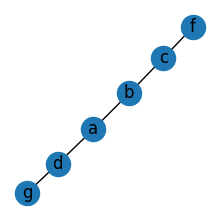

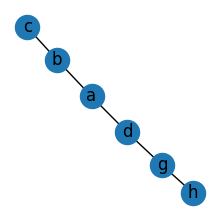

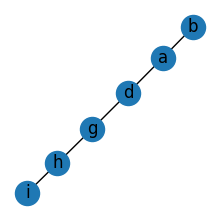

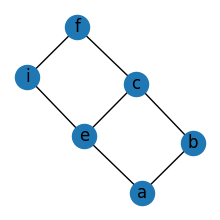

Subgraph 11 is isomorphic to graph2


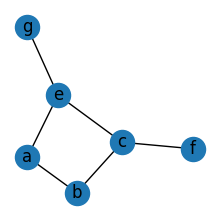

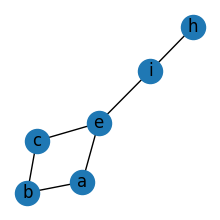

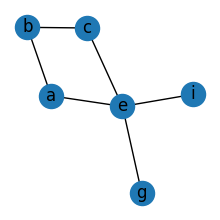

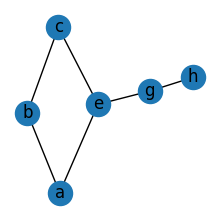

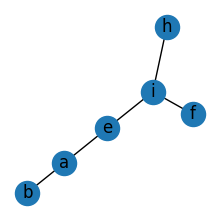

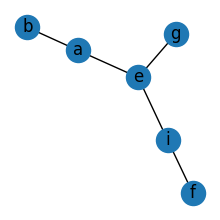

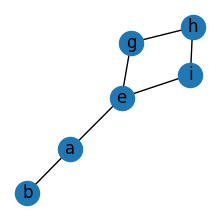

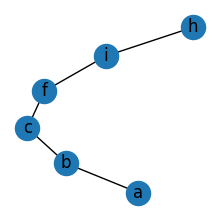

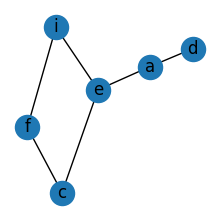

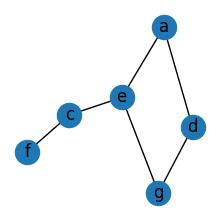

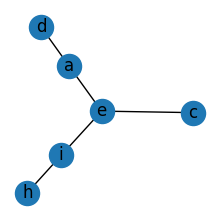

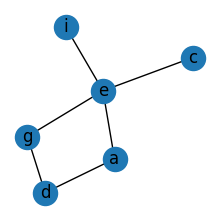

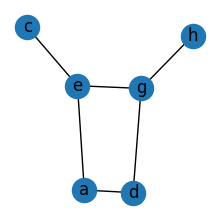

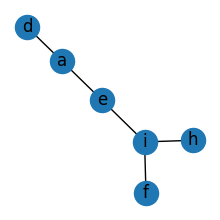

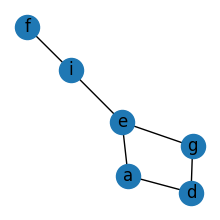

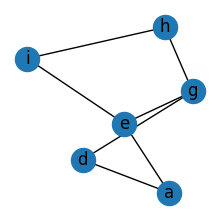

Subgraph 27 is isomorphic to graph2


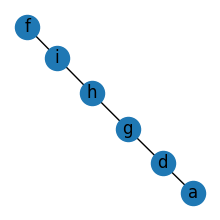

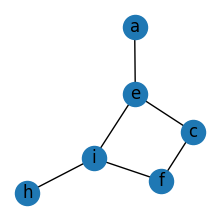

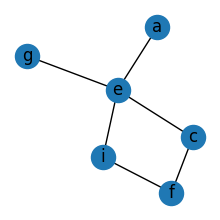

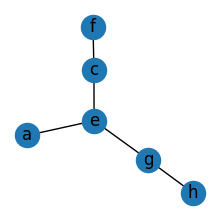

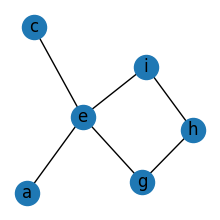

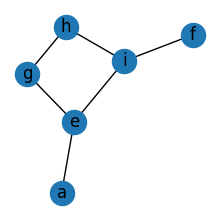

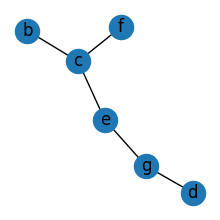

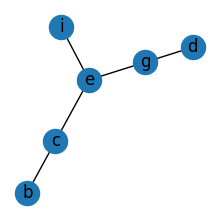

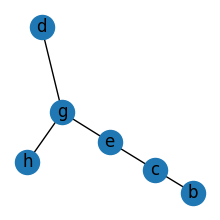

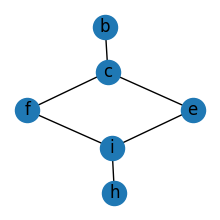

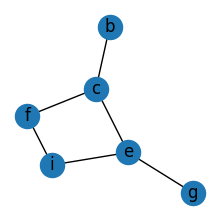

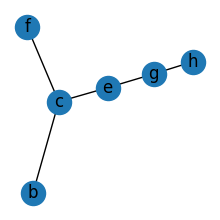

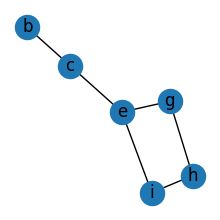

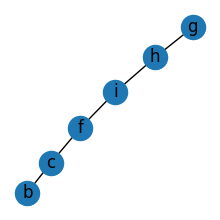

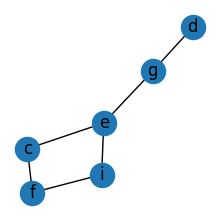

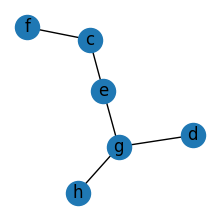

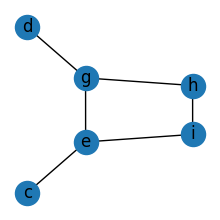

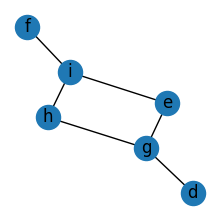

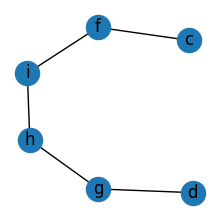

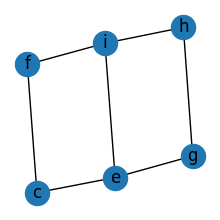

Subgraph 47 is isomorphic to graph2


In [14]:
# plot the subgraphs
for i, subgraph in enumerate(subgraphs):
    plt.figure(figsize=(2, 2))
    nx.draw(subgraph, with_labels=True)
    plt.show()
    if nx.is_isomorphic(subgraph, graph2):
        print("Subgraph", i, "is isomorphic to graph2")

In [12]:
# check isomorphism with the subgraphs, stop when found one
is_isomorphic = False
for i, subgraph in enumerate(subgraphs):
    if nx.is_isomorphic(subgraph, graph2):
        is_isomorphic = True
        break
    
print("Is isomorphic: ", is_isomorphic)

Is isomorphic:  True
